<a href="https://colab.research.google.com/github/MHendriF/Belajar-Analisis-Data-dengan-Python/blob/main/Submission/Proyek_Analisis_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Muhamad Hendri Febriansyah
- **Email:** hendrifebriansyah28@gmail.com
- **ID Dicoding:** leopard28zero

## Menentukan Pertanyaan Bisnis

- Bagaimana tren penyewaan sepeda di tiap musimnya pada tahun 2011 dan 2012?
- Bagaimana perbedaan tren penyewaan sepeda setiap bulannya pada tahun 2011 dengan 2012?
- Bagaimana perbandingan pengguna tiap bulan di tahun 2011 dan 2012?
- Kapan traffic tertinggi dan terendah penyewaan sepeda?
- Bagaimana komposisi pengguna Bike sharing?

## Import Semua Packages/Library yang Digunakan

In [116]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

- Load data day_df

In [117]:
day_df = pd.read_csv("https://raw.githubusercontent.com/MHendriF/Belajar-Analisis-Data-dengan-Python/main/Submission/data/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


- Load data hour_df

In [118]:
hour_df = pd.read_csv("https://raw.githubusercontent.com/MHendriF/Belajar-Analisis-Data-dengan-Python/main/Submission/data/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

#### Accessing Data Day

- Check tipe data day_df

In [119]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Pada kolom *dteday* tipe datanya belum sesuai, seharusnya direpresentasikan dalam *datetime* bukan *object*

- Check missing value data day_df

In [120]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Data sudah sesuai, tidak ditemukan adanya missing value

- Check duplikasi data day_df

In [121]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


Data sudah sesuai, tidak ditemukan adanya duplikasi

- Check parameter statistik dari kolom numerik data day_df

In [122]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


Data sudah sesuai, tidak ditemukan adanya keanehan pada nilai statistiknya

#### Accessing Data Hour

- Check tipe data hour_df

In [123]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


Pada kolom *dteday* tipe datanya belum sesuai, seharusnya direpresentasikan dalam *datetime* bukan *object*

- Check missing value data hour_df

In [124]:
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Data sudah sesuai, tidak ditemukan adanya missing value

- Check duplikasi data hour_df

In [125]:
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

Jumlah duplikasi:  0


Data sudah sesuai, tidak ditemukan adanya duplikasi

- Check parameter statistik dari kolom numerik data hour_df

In [126]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


Data sudah sesuai, tidak ditemukan adanya keanehan pada nilai statistiknya

Dari hasil pengecekan data, dapat kita tarik asumsi bahwa data *day_df* merupakan summary dari data *hour_df*, sehingga kita akan menggunakan data *hour_df* saja utk project ini karena lebih mendetail.

### Cleaning Data

- Menghapus kolom yang tidak diperlukan

In [127]:
# Drop column
drop_col = ['instant']

for i in hour_df.columns:
    if i in drop_col:
        hour_df.drop(labels=i, axis=1, inplace=True)

# Check data
hour_df.head()

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


- Mengganti nama label pada dataset agar lebih mudah dipahami

In [128]:
hour_df.rename(columns={'dteday':'date',
                        'yr':'year',
                        'mnth':'month',
                        'hr':'hour',
                        'holiday':'is_holiday',
                        'workingday':'is_working_day',
                        'weathersit':'weather_situation',
                        'temp':'temperature',
                        'atemp':'feels_like_temperature',
                        'hum':'humidity',
                        'casual':'casual_users',
                        'registered':'registered_users',
                        'cnt':'total_users'}, inplace=True)

# Check label
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   date                    17379 non-null  object 
 1   season                  17379 non-null  int64  
 2   year                    17379 non-null  int64  
 3   month                   17379 non-null  int64  
 4   hour                    17379 non-null  int64  
 5   is_holiday              17379 non-null  int64  
 6   weekday                 17379 non-null  int64  
 7   is_working_day          17379 non-null  int64  
 8   weather_situation       17379 non-null  int64  
 9   temperature             17379 non-null  float64
 10  feels_like_temperature  17379 non-null  float64
 11  humidity                17379 non-null  float64
 12  windspeed               17379 non-null  float64
 13  casual_users            17379 non-null  int64  
 14  registered_users        17379 non-null

- Mengganti value pada dataframe agar lebih mudah dipahami

In [129]:
# Mapping season
season_map = {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}
hour_df['season'] = hour_df['season'].map(season_map)

# Mapping year
year_map = {0: 2011, 1: 2012}
hour_df['year'] = hour_df['year'].map(year_map)

# Mapping month
month_map = {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 
             5: 'May', 6: 'June', 7: 'July', 8: 'Aug', 
             9: 'Sept', 10: 'Oct', 11: 'Nov', 12: 'Dec'}
hour_df['month'] = hour_df['month'].map(month_map)

# Mapping day
day_map = {0: 'Sun', 1: 'Mon', 2: 'Tue', 3: 'Wed', 
           4: 'Thu', 5: 'Fri', 6: 'Sat'}
hour_df['weekday'] = hour_df['weekday'].map(day_map)

# Mapping weather situation
wather_map = {1: 'good', 2: 'moderate', 3: 'bad', 4: 'worse'}
hour_df['weather_situation'] = hour_df['weather_situation'].map(wather_map)

# Mapping hour
hour_map = {0:'12 am', 1: '01 am', 2: '02 am', 3: '03 am', 4: '04 am', 
            5: '05 am', 6: '06 am', 7: '07 am', 8: '08 am', 9: '09 am', 
            10: '10 am', 11: '11 am', 12: '12 pm', 13: '01 pm', 14: '02 pm',
            15: '03 pm', 16: '04 pm', 17: '05 pm', 18: '06 pm', 19: '07 pm',
            20: '08 pm', 21: '09 pm', 22: '10 pm', 23: '11 pm'}
hour_df['hour'] = hour_df['hour'].map(hour_map)

# Check data
hour_df.head()

,date,season,year,month,hour,is_holiday,weekday,is_working_day,weather_situation,temperature,feels_like_temperature,humidity,windspeed,casual_users,registered_users,total_users
0,2011-01-01,Spring,2011,Jan,12 am,0,Sat,0,good,0.24,0.2879,0.81,0.0,3,13,16
1,2011-01-01,Spring,2011,Jan,01 am,0,Sat,0,good,0.22,0.2727,0.80,0.0,8,32,40
2,2011-01-01,Spring,2011,Jan,02 am,0,Sat,0,good,0.22,0.2727,0.80,0.0,5,27,32
3,2011-01-01,Spring,2011,Jan,03 am,0,Sat,0,good,0.24,0.2879,0.75,0.0,3,10,13
4,2011-01-01,Spring,2011,Jan,04 am,0,Sat,0,good,0.24,0.2879,0.75,0.0,0,1,1


- Mengganti data tipe kolom

In [130]:
# Change type data to category
hour_df['season'] = hour_df['season'].astype('category')
hour_df['year'] = hour_df['year'].astype('category')
hour_df['month'] = hour_df['month'].astype('category')
hour_df['hour'] = hour_df['hour'].astype('category')
hour_df['is_holiday'] = hour_df['is_holiday'].astype('category')
hour_df['weekday'] = hour_df['weekday'].astype('category')
hour_df['is_working_day'] = hour_df['is_working_day'].astype('category')
hour_df['weather_situation'] = hour_df['weather_situation'].astype('category')

# Change type data
hour_df['date'] = pd.to_datetime(hour_df['date'])

In [131]:
# Check label
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   date                    17379 non-null  datetime64[ns]
 1   season                  17379 non-null  category      
 2   year                    17379 non-null  category      
 3   month                   17379 non-null  category      
 4   hour                    17379 non-null  category      
 5   is_holiday              17379 non-null  category      
 6   weekday                 17379 non-null  category      
 7   is_working_day          17379 non-null  category      
 8   weather_situation       17379 non-null  category      
 9   temperature             17379 non-null  float64       
 10  feels_like_temperature  17379 non-null  float64       
 11  humidity                17379 non-null  float64       
 12  windspeed               17379 non-null  float6

- Simpan dataset yang sudah diproses

In [132]:
hour_df.to_csv("dashboard\main_data.csv", index=False)

<>:1: SyntaxWarning: invalid escape sequence '\m'
<>:1: SyntaxWarning: invalid escape sequence '\m'
C:\Users\LEGION\AppData\Local\Temp\ipykernel_9880\2533384316.py:1: SyntaxWarning: invalid escape sequence '\m'
  hour_df.to_csv("dashboard\main_data.csv", index=False)


## Exploratory Data Analysis (EDA)

### Explore Data Hour

In [133]:
hour_df.groupby(by="season", observed=True).agg({
    "total_users": ["max", "min", "mean", "sum", "std"]
})

total_users                                     
               max min        mean      sum         std
season                                                 
Fall           977   1  236.016237  1061129  197.711630
Spring         801   1  111.114569   471348  119.224010
Summer         957   1  208.344069   918589  188.362473
Winter         967   1  198.868856   841613  182.967972

In [134]:
hour_df.groupby(by="month", observed=True).agg({
    "total_users": ["max", "min", "mean", "sum", "std"]
})

total_users                                    
              max min        mean     sum         std
month                                                
Apr           822   1  187.260960  269094  181.137902
Aug           941   1  238.097627  351194  200.444648
Dec           759   1  142.303439  211036  141.080674
Feb           610   1  112.865026  151352  112.486565
Jan           559   1   94.424773  134933   99.907146
July          913   1  231.819892  344948  187.483806
June          900   1  240.515278  346342  196.038950
Mar           957   1  155.410726  228920  163.543050
May           873   1  222.907258  331686  187.721497
Nov           729   1  177.335421  254831  158.973887
Oct           963   1  222.158511  322352  203.477057
Sept          977   1  240.773138  345991  214.609531

In [135]:
hour_df.groupby(by="weather_situation", observed=True).agg({
    "total_users": ["max", "min", "mean", "sum", "std"]
})

total_users                                     
                          max min        mean      sum         std
weather_situation                                                 
bad                       891   1  111.579281   158331  133.781045
good                      977   1  204.869272  2338173  189.487773
moderate                  957   1  175.165493   795952  165.431589
worse                     164  23   74.333333      223   77.925178

In [136]:
total_user_by_season_every_year_df = hour_df.groupby(by=["season", "year"], observed=True).agg({
    "casual_users": "sum",
    "registered_users": "sum",
    "total_users": "sum"
})
total_user_by_season_every_year_df.head(8)

casual_users  registered_users  total_users
season year                                             
Fall   2011         95450            324200       419650
       2012        130641            510838       641479
Spring 2011         21425            128575       150000
       2012         39197            282151       321348
Summer 2011         77564            269752       347316
       2012        125958            445315       571273
Winter 2011         52813            273324       326137
       2012         76969            438507       515476

In [137]:
total_user_by_weather_every_year_df = hour_df.groupby(by=["weather_situation", "year"], observed=True).agg({
    "casual_users": "sum",
    "registered_users": "sum",
    "total_users": "sum"
})
total_user_by_weather_every_year_df.head(8)

casual_users  registered_users  total_users
weather_situation year                                             
bad               2011          9709             57786        67495
                  2012         13074             77762        90836
good              2011        183733            691320       875053
                  2012        279012           1184108      1463120
moderate          2011         53809            246710       300519
                  2012         80672            414761       495433
worse             2011             1                35           36
                  2012             7               180          187

In [138]:
all_user_every_day_df = hour_df.groupby(by=["weekday"], observed=True).agg({
    "casual_users": "sum",
    "registered_users": "sum",
    "total_users": "sum"
})
all_user_every_day_df.head(7)

,casual_users,registered_users,total_users
weekday,,,
Fri,78238,409552,487790
Mon,70784,384719,455503
Sat,153852,323955,477807
Sun,140521,303506,444027
Thu,61460,423935,485395
Tue,57843,411266,469109
Wed,57319,415729,473048


In [139]:
hour_df['month'] = pd.Categorical(hour_df['month'], categories=
    ['Jan','Feb','Mar','Apr','May','June','July','Aug','Sept','Oct','Nov','Dec'],
    ordered=True)

total_user_by_month_every_year_df = hour_df.groupby(by=["month", "year"], observed=True).agg({
    "total_users": "sum"
})
total_user_by_month_every_year_df.head(24)

total_users
month year             
Jan   2011        38189
      2012        96744
Feb   2011        48215
      2012       103137
Mar   2011        64045
      2012       164875
Apr   2011        94870
      2012       174224
May   2011       135821
      2012       195865
June  2011       143512
      2012       202830
July  2011       141341
      2012       203607
Aug   2011       136691
      2012       214503
Sept  2011       127418
      2012       218573
Oct   2011       123511
      2012       198841
Nov   2011       102167
      2012       152664
Dec   2011        87323
      2012       123713

In [140]:
total_user_by_hour_df = hour_df.groupby(by=["hour"], observed=True).agg({
    "casual_users": "sum",
    "registered_users": "sum",
    "total_users": "sum"
}).sort_values(by='hour', ascending=False)
total_user_by_hour_df.head(25)

,casual_users,registered_users,total_users
hour,,,
12 pm,49718,134696,184414
12 am,7375,31755,39130
11 pm,11065,52876,63941
11 am,43286,108034,151320
10 pm,16200,79412,95612
10 am,33789,92468,126257
09 pm,20570,104875,125445
09 am,22458,136980,159438
08 pm,26378,138172,164550


In [141]:
user_composition_df = hour_df[['casual_users', 'registered_users']].sum()
user_composition_df.head(2)

casual_users         620017
registered_users    2672662
dtype: int64

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana tren penyewaan sepeda di tiap musimnya pada tahun 2011 dan 2012?

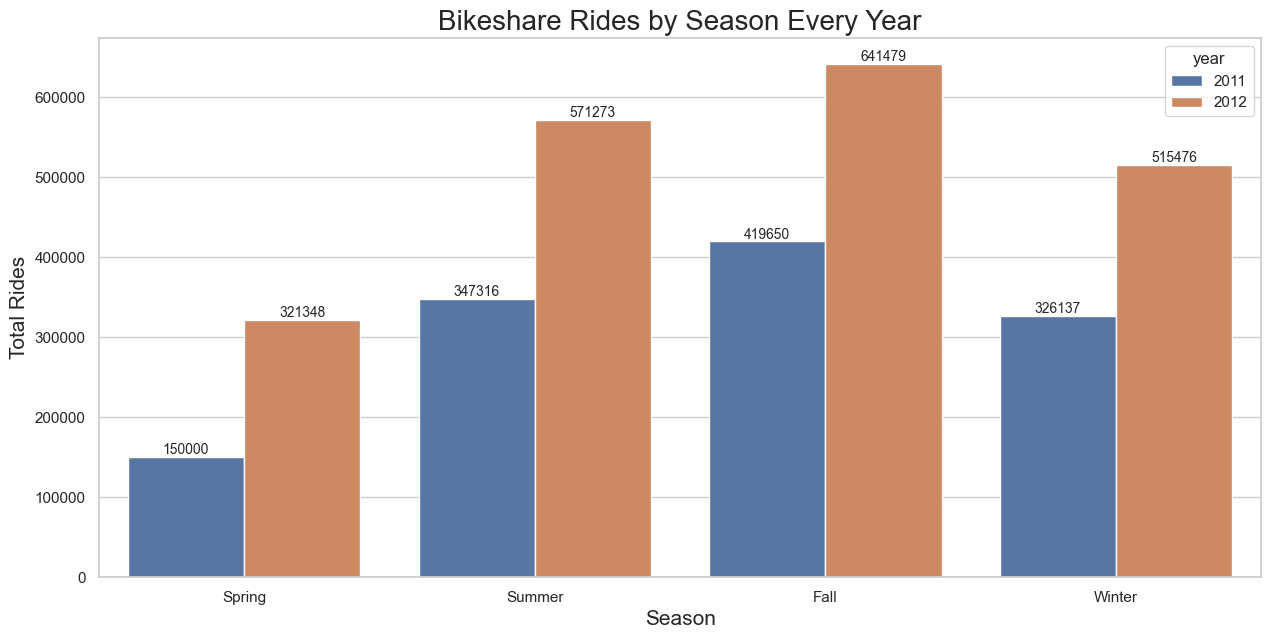

In [142]:
season_order = ['Spring', 'Summer', 'Fall', 'Winter']
fig, ax = plt.subplots(figsize=(15, 7))

sns.barplot(data=total_user_by_season_every_year_df, x="season", y="total_users", hue="year", errorbar=None, order=season_order, ax=ax)

for i in ax.containers:
    ax.bar_label(i,fontsize=10)

plt.title("Bikeshare Rides by Season Every Year", size=20)
plt.xlabel("Season", size=15)
plt.ylabel("Total Rides", size=15)
plt.show()

Pada tahun 2012 penyewaan sepeda mengalami kenaikan jika dibandingan dengan musim yang sama pada tahun 2011 sebelumnya. Jumlah penyewaan **tertinggi** pada tahun **2011** dan **2012** terjadi pada musim gugur (**Fall**) dengan masing-masing jumlah penyewaan yaitu **419.650 dan 641.479**. Sedangkan untuk jumlah penyewaan sepeda **terendah** di tahun **2011** dan **2012** terjadi pada musim yang sama yaitu musim semi (**Spring**) dengan masing-masing jumlah penyewaan yaitu **150.000 dan 321.348**

### Pertanyaan 2: Bagaimana tren penyewaan sepeda di tiap kondisi cuaca pada tahun 2011 dan 2012?

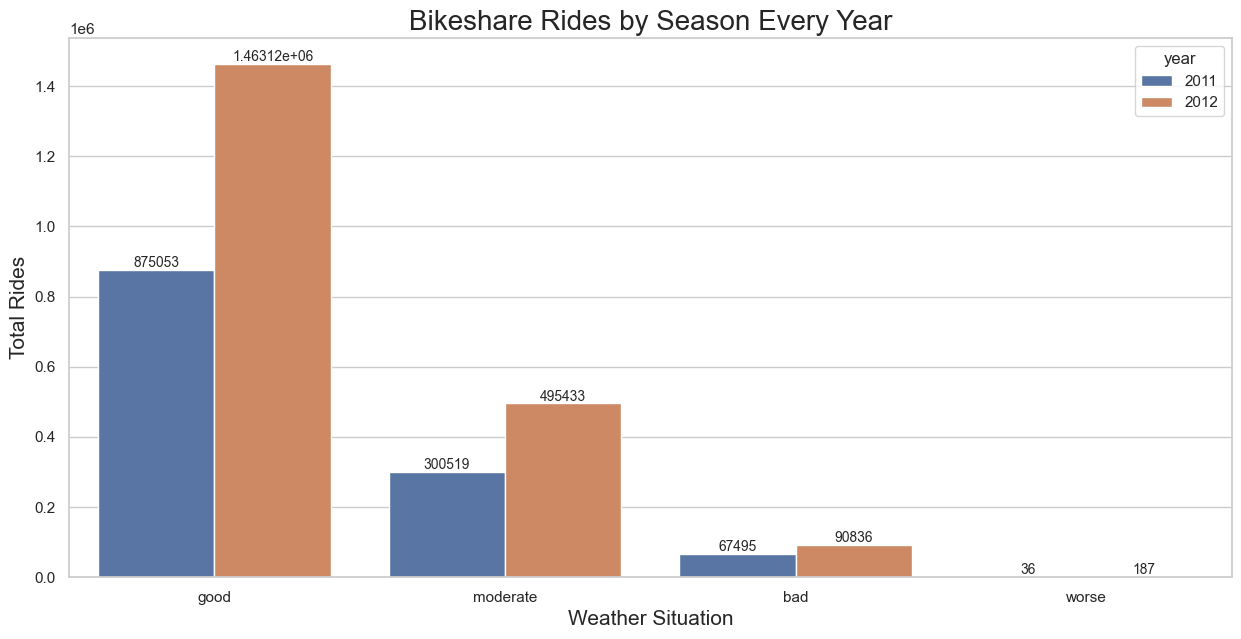

In [143]:
weather_order = ['good', 'moderate', 'bad', 'worse']
fig, ax = plt.subplots(figsize=(15, 7))

sns.barplot(data=total_user_by_weather_every_year_df, x="weather_situation", y="total_users", hue="year", errorbar=None,  order=weather_order, ax=ax)

for i in ax.containers:
    ax.bar_label(i,fontsize=10)
    
plt.title("Bikeshare Rides by Season Every Year", size=20)
plt.xlabel("Weather Situation", size=15)
plt.ylabel("Total Rides", size=15)
plt.show()

Pada tahun **2011** dan **2012** penyewaan sepeda tertinggi pada saat kondisi cuaca sedang bagus, yaitu ketika cuaca cerah / sedikit berawan / berawan sebagian. Dengan jumalah masing-masing penyewaan yaitu **875.053** dan **1.463.120**. Sedangkan pada saat cuaca buruk ketika terjadi hujan lebat / badai es / kabut salju / berkabut di tahun **2011** hanya terdapat **36** penyewaan dan ditahun **2012** mengalami sedikit kenaikan menjadi **187** penyewaan.

### Pertanyaan 3: Bagaimana perbedaan tren penyewaan sepeda setiap bulannya pada tahun 2011 dengan 2012?

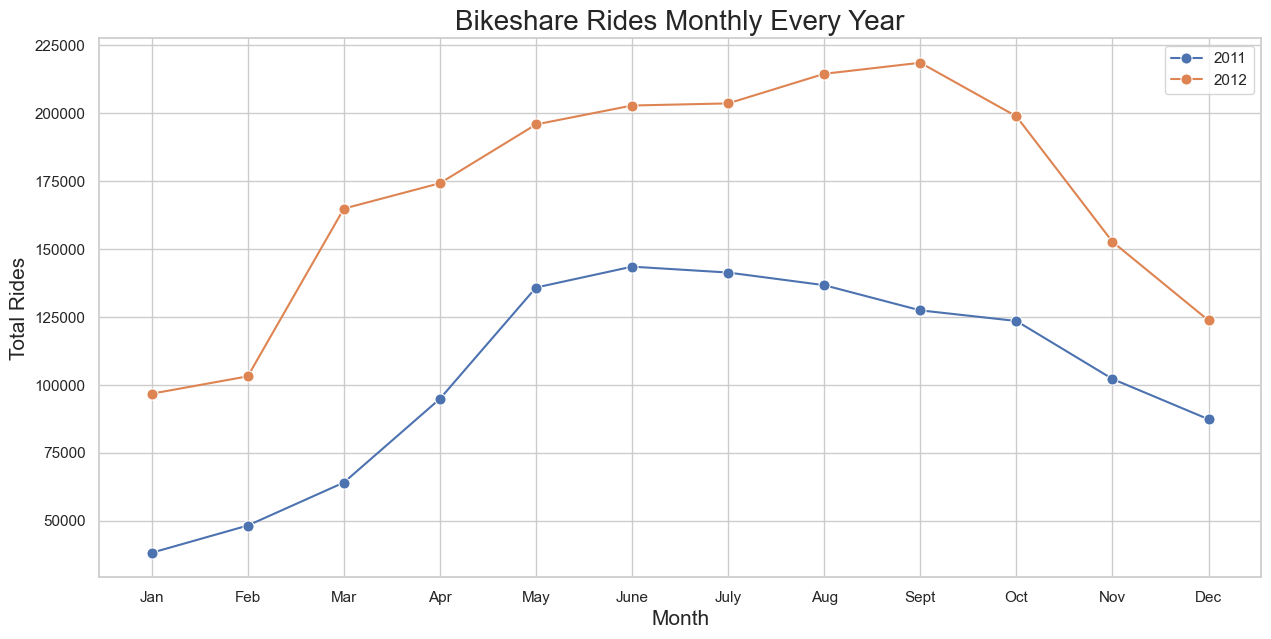

In [144]:
fig, ax = plt.subplots(figsize=(15, 7))
sns.set(style="whitegrid")
sns.lineplot(x='month', y='total_users', hue='year', data=total_user_by_month_every_year_df, marker="o", markersize=8,  ax=ax)
    
plt.title("Bikeshare Rides Monthly Every Year",size=20)
plt.xlabel('Month',size=15)
plt.ylabel('Total Rides',size=15)
plt.legend()
plt.show()

Pada tahun **2011** penyewaan sepeda menggalami kenaikan dari bulan Januari sampai Juni dengan jumlah penyewa tertinggi di bulan **Juni** sebanyak **143.512**. Sedangkan di tahun **2012** tren penyewaan sepeda bertahan lebih lama dibandingkan dengan tahun sebelumnya, dimana puncak tertinggi terjadi pada bulan **September** dengan total penyewa **218.573**. 

### Pertanyaan 4: Kapan traffic tertinggi dan terendah penyewaan sepeda?

Text(0, 0.5, 'Time')

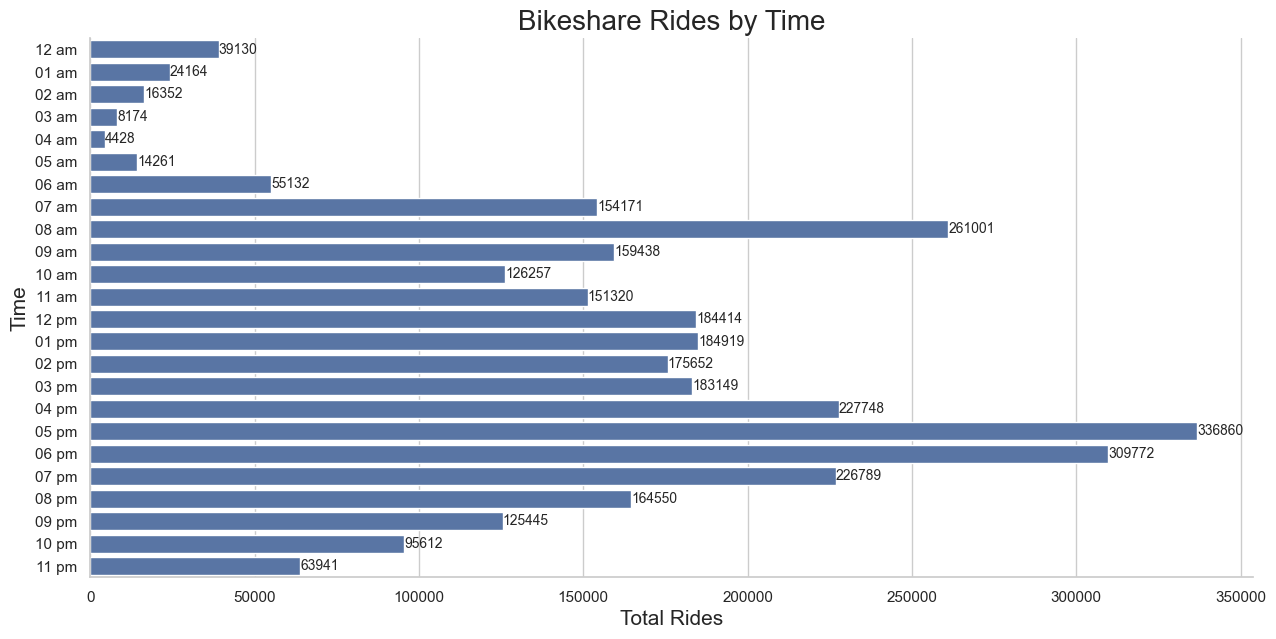

In [145]:
hour_order = ['12 am', '01 am', '02 am', '03 am', '04 am', 
            '05 am', '06 am', '07 am', '08 am', '09 am', 
            '10 am', '11 am', '12 pm', '01 pm', '02 pm',
            '03 pm', '04 pm', '05 pm', '06 pm', '07 pm',
            '08 pm', '09 pm', '10 pm', '11 pm']

fig, ax = plt.subplots(figsize=(15, 7))
sns.despine(fig)
sns.set(style="whitegrid")
sns.barplot(data=total_user_by_hour_df, x='total_users', y='hour', orient='h', order=hour_order)

for i in ax.containers:
    ax.bar_label(i,fontsize=10)
    
plt.title('Bikeshare Rides by Time',size=20)
plt.xlabel('Total Rides',size=15)
plt.ylabel('Time',size=15)

Penyewaan sepeda tertinggi terjadi pada jam 6 sore kemudian diikuti jam 7 sore dengan jumlah penyewa masing-masing sebanyak **336.860 dan 309.772**. Sedangkan untuk penyewaan sepeda terendah ada di jam 4 pagi dengen jumlah penyewa **4.428**

### Pertanyaan 5: Bagaimana komposisi pengguna Bike sharing?

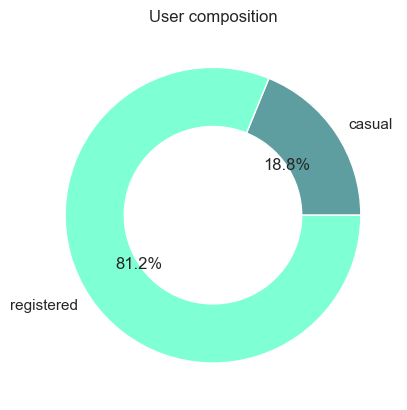

In [146]:
casreg_pie = hour_df[['casual_users', 'registered_users']].sum()
plt.pie(
    x=casreg_pie,
    labels=('casual', 'registered'),
    colors=('#5F9EA0', '#7FFFD4'),
    autopct='%1.1f%%',
    wedgeprops = {'width':0.4}
)
plt.title("User composition")
plt.show()

Penyewa sepeda didominasi oleh pengguna yang sudah **terdaftar** yaitu sebanyak **81.2%** dan sisanya adalah pengguna **kasual** sebanyak **18.8%**

## Conclusion

- Selama 2 tahun berturut-turut, musim gugur merupakan musim yang paling digemari orang-orang untuk melakukan aktifitas bersepeda diluar ruang. Selain itu pada musim semi, musim panas dan musim dingin ditahun 2012, penyewaan sepeda juga mengalami peningkatan jika dibandingan dengan tahun 2011. Hal tersebut menunjukkan minat orang-orang untuk bersepeda semakin meningkat.

- Kondisi cuaca sangat mempengaruhi jumlah penyewaan sepeda, sebagian besar orang memilih untuk bersepeda ketika cuacanya sedang bagus yakni pada saat cuaca cerah, sedikit berawan atau berawan sebagian.

- Tren penyewaan sepeda di tahun 2012 mengalami kenaikan secara jumlah dan lama periode(bulan) dibandingkan dengan tahun 2011 sebelumnya. Dimana titik tertinggi penyewaan sepeda pada tahun 2011 terjadi di bulan **Juni** sebanyak **143.512** sedangkan pada tahun 2012 terjadi di bulan **September** dengan total **218.573**. 

- Traffic penyewaan sepeda tertinggi berlangsung pada jam 5 - 6 sore, dimana pada waktu tersebut merupakan waktunya orang-orang pulang dari tempat kerja

- Persentase penyewaan sepeda masih didominasi oleh pengguna yang sudah terdaftar, sebanyak **81.2%** dan sisanya adalah pengguna **kasual** sebanyak **18.8%**